In [1]:
pip install --upgrade tensorflowimport os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflowimport (from versions: none)
ERROR: No matching distribution found for tensorflowimport


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

import warnings
warnings.filterwarnings('ignore')


from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


C:\Users\Lakshmi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lakshmi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Lakshmi\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
 main_dir = 'C:/Users/Lakshmi/Desktop/Main project/audio_dataset'

In [4]:
audio_data = []
file_names = []

In [5]:
import os

# Define the paths
dataset_root = 'C:/Users/Lakshmi/Desktop/Main project/audio_dataset'
subdirs = ['train', 'test']
selected_categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

# Iterate through subdirectories (train and test)
for subdir in subdirs:
    subdir_path = os.path.join(dataset_root, subdir)
    categories = os.listdir(subdir_path)
    
    print(f"Contents of {subdir} folder:")
    for category in categories:
        if category in selected_categories: 
            category_path = os.path.join(subdir_path, category)
            if os.path.isdir(category_path):
                print(f"Category: {category}")
                
                audio_files = [file for file in os.listdir(category_path) if file.endswith('.ogg')]
                print(f"Audio files in {category} category:")
                for audio_file in audio_files:
                    print(audio_file)


Contents of train folder:
Category: day_1
Audio files in day_1 category:
WhatsApp Audio 2023-07-06 at 6.16.25 PM (1).ogg
WhatsApp Audio 2023-07-06 at 6.16.25 PM.ogg
WhatsApp Audio 2023-07-06 at 6.16.26 PM.ogg
WhatsApp Audio 2023-07-06 at 6.16.51 PM.ogg
WhatsApp Audio 2023-07-06 at 6.16.52 PM.ogg
WhatsApp Audio 2023-07-06 at 6.48.00 PM.ogg
WhatsApp Audio 2023-07-06 at 6.49.41 PM.ogg
WhatsApp Audio 2023-09-01 at 12.13.33 AM (1).ogg
WhatsApp Audio 2023-09-01 at 12.13.33 AM (2).ogg
WhatsApp Audio 2023-09-01 at 12.13.33 AM.ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (1).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (2).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (3).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (4).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (5).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (6).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM (7).ogg
WhatsApp Audio 2023-09-01 at 12.13.34 AM.ogg
WhatsApp Audio 2023-09-01 at 12.14.54 AM (1).ogg
WhatsApp Audio 2023-09-01 at 12.14.

## Visulization

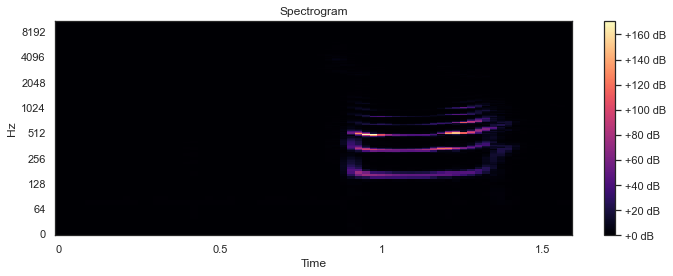

In [6]:
#visualising the spectrogram of just one audio

audio_path = 'audio_dataset/train/day_2/WhatsApp Audio 2023-09-01 at 12.26.16 AM (2).ogg'

y, sr = librosa.load(audio_path)

D = np.abs(librosa.stft(y))

# Ploting the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()

plt.show()
ipd.Audio(audio_path)

In [7]:
from scipy.stats import skew, kurtosis


dataset_root = 'C:/Users/Lakshmi/Desktop/Main project/audio_dataset'


subdirs = ['train', 'test']

# List of categories 
categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']


moments_train = {}
moments_test = {}

# Iterate through subdirectories
for subdir in subdirs:
    subdir_path = os.path.join(dataset_root, subdir)
    

    moments_subdir = {}
    
    # Iterate through categories
    for category in categories:
        category_path = os.path.join(subdir_path, category)
        durations = []

        # Iterate through audio files in the current category
        for filename in os.listdir(category_path):
            if filename.endswith('.ogg'):
                file_path = os.path.join(category_path, filename)
               # print("Loading:", file_path)  # Debugging print statemen
                audio_data, sr = librosa.load(file_path, sr=None)
                duration = librosa.get_duration(y=audio_data, sr=sr)
                durations.append(duration)

        # Calculate moments 
        moments = {
            'mean': np.mean(durations), 
            'variance': np.var(durations), 
            'skewness': skew(durations),
            'kurtosis': kurtosis(durations)
        }

        # Store moments in the dictionary for the current subdirectory
        moments_subdir[category] = moments
    
    # Store moments for the current subdirectory in the overall moments dictionary
    if subdir == 'train':
        moments_train = moments_subdir
    elif subdir == 'test':
        moments_test = moments_subdir

# Print the calculated moments for train and test parts
print("Train Part Moments:", moments_train) 
print("\n")
print("Test Part Moments:", moments_test)

Train Part Moments: {'day_1': {'mean': 1.4525768072289154, 'variance': 0.17357312201857128, 'skewness': 0.8344507500835358, 'kurtosis': 0.09178443507571332}, 'day_2': {'mean': 1.3040193014705879, 'variance': 0.1419005819459275, 'skewness': 1.6911639520589767, 'kurtosis': 3.5836994841793786}, 'day_3': {'mean': 1.0886637931034484, 'variance': 0.03417517575802616, 'skewness': 2.3912957123238727, 'kurtosis': 5.478222296967521}, 'day_4': {'mean': 1.2582317216981134, 'variance': 0.1733123191308211, 'skewness': 1.6805904129334157, 'kurtosis': 2.1171969734167844}, 'day_5': {'mean': 1.4301625874125874, 'variance': 0.19973998700501858, 'skewness': 1.4298303077370649, 'kurtosis': 1.96805032620638}, 'day_6': {'mean': 1.396292361111111, 'variance': 0.17833642186005016, 'skewness': 1.251842827336018, 'kurtosis': 1.4573190156453286}, 'day_7': {'mean': 1.3474592592592591, 'variance': 0.16458868676611796, 'skewness': 1.179594160757464, 'kurtosis': 1.077032499717526}}


Test Part Moments: {'day_1': {'me

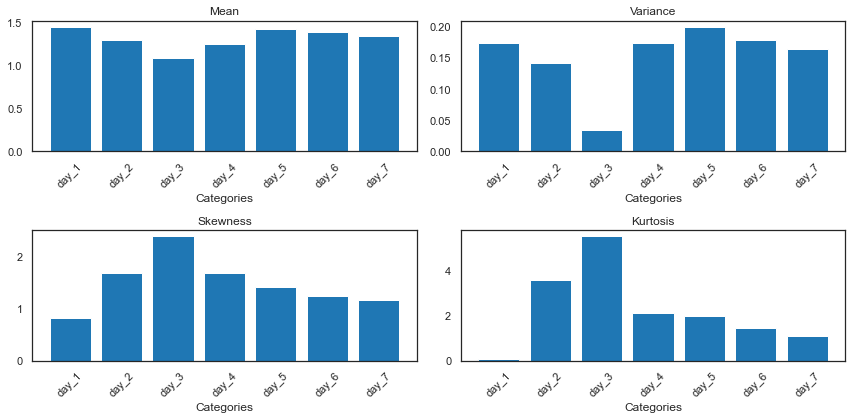

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


mean_values = [moments_train[category]['mean'] for category in categories]
variance_values = [moments_train[category]['variance'] for category in categories]
skewness_values = [moments_train[category]['skewness'] for category in categories]
kurtosis_values = [moments_train[category]['kurtosis'] for category in categories]


plt.figure(figsize=(12, 6))

# Mean
plt.subplot(2, 2, 1)
plt.bar(categories, mean_values)
plt.title('Mean')
plt.xlabel('Categories')
plt.xticks(rotation=45)

# Variance
plt.subplot(2, 2, 2)
plt.bar(categories, variance_values)
plt.title('Variance')
plt.xlabel('Categories')
plt.xticks(rotation=45)

# Skewness
plt.subplot(2, 2, 3)
plt.bar(categories, skewness_values)
plt.title('Skewness')
plt.xlabel('Categories')
plt.xticks(rotation=45)

# Kurtosis
plt.subplot(2, 2, 4)
plt.bar(categories, kurtosis_values)
plt.title('Kurtosis')
plt.xlabel('Categories')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Preprocessing

### Data Augmentation

In [9]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install librosa soundfile


Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
import numpy as np
import soundfile as sf
from scipy import interpolate
from tqdm import tqdm
import matplotlib.pyplot as plt

# Function to perform time stretching
def time_stretch(input_audio, stretch_factor):
    input_length = len(input_audio)
    output_length = int(input_length * stretch_factor)
    
    # Create a time axis for the original audio
    time_axis = np.arange(input_length)
    
    # Create a time axis for the stretched audio
    stretched_time_axis = np.linspace(0, input_length - 1, output_length)
    
    # Create an interpolation function
    interpolator = interpolate.interp1d(time_axis, input_audio, kind='linear', fill_value='extrapolate')
    
    # Perform interpolation to stretch/compress time
    stretched_audio = interpolator(stretched_time_axis)
    
    return stretched_audio

# Define paths
data_dir = r'C:\Users\Lakshmi\Desktop\Main project\audio_dataset'
output_dir = r'C:\Users\Lakshmi\Desktop\Main project\augmented_audio'

train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

# Stretch factors to apply (0.8 for compression, 1.2 for stretching)
stretch_factors = [0.8, 1.2]

# Loop through training and testing directories
for data_split in [train_dir, test_dir]:
    for category in os.listdir(data_split):
        category_dir = os.path.join(data_split, category)
        output_category_dir = os.path.join(output_dir, os.path.basename(data_split), category)
        
        # Create output directories if they don't exist
        os.makedirs(output_category_dir, exist_ok=True)
        
        # Loop through audio files
        for audio_file in tqdm(os.listdir(category_dir)):
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(category_dir, audio_file)
                output_audio_path_base = os.path.join(output_category_dir, os.path.splitext(audio_file)[0])
                
                # Load the audio file
                audio_data, sr = sf.read(audio_path)
                
                # Apply time stretching for each factor
                for stretch_factor in stretch_factors:
                    stretched_audio = time_stretch(audio_data, stretch_factor)
                    output_audio_path = f'{output_audio_path_base}_stretch_{stretch_factor:.2f}.ogg'
                    sf.write(output_audio_path, stretched_audio, sr)

print("Augmentation complete!")



100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [00:03<00:00, 15.70it/s]

Augmentation complete!


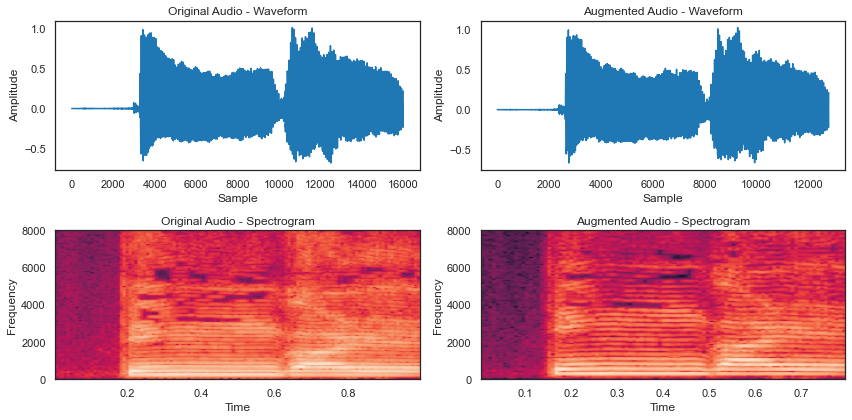

Original Audio:


Augmented Audio:


In [12]:
import os
import soundfile as sf
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

# Load the original and augmented audio
original_audio_path = 'C:/Users/Lakshmi/Desktop/Main project/audio_dataset/test/day_1/WhatsApp Ptt 2023-08-05 at 6.31.18 PM.ogg'
augmented_audio_path = 'C:/Users/Lakshmi/Desktop/Main project/augmented_audio/test/day_1/WhatsApp Ptt 2023-08-05 at 6.31.18 PM_stretch_0.80.ogg'

original_audio, sr_original = sf.read(original_audio_path)
augmented_audio, sr_augmented = sf.read(augmented_audio_path)

# Plot waveforms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title("Original Audio - Waveform")
plt.plot(original_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 2)
plt.title("Augmented Audio - Waveform")
plt.plot(augmented_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Plot spectrograms
plt.subplot(2, 2, 3)
plt.specgram(original_audio, Fs=sr_original)
plt.title("Original Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.specgram(augmented_audio, Fs=sr_augmented)
plt.title("Augmented Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Play the original audio
print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr_original))

# Play the augmented audio
print("Augmented Audio:")
ipd.display(ipd.Audio(augmented_audio, rate=sr_augmented))


### Amplitude NOrmalisation

In [13]:
import os
import soundfile as sf
import numpy as np

# Paths
augmented_dir = r'C:\Users\Lakshmi\Desktop\Main project\augmented_audio'
normalized_augmented_dir = r'C:\Users\Lakshmi\Desktop\Main project\normalized_augmented_audio'

# Create the new directory for normalized augmented files
os.makedirs(normalized_augmented_dir, exist_ok=True)

# Iterate through the augmented audio files
for data_split in os.listdir(augmented_dir):
    data_split_dir = os.path.join(augmented_dir, data_split)
    normalized_data_split_dir = os.path.join(normalized_augmented_dir, data_split)
    
    # Create the directory for the normalized data split
    os.makedirs(normalized_data_split_dir, exist_ok=True)
    
    for category in os.listdir(data_split_dir):
        category_dir = os.path.join(data_split_dir, category)
        normalized_category_dir = os.path.join(normalized_data_split_dir, category)
        
        # Create the directory for the normalized category
        os.makedirs(normalized_category_dir, exist_ok=True)
        
        for augmented_file in os.listdir(category_dir):
            if augmented_file.endswith('.ogg'):
                augmented_audio_path = os.path.join(category_dir, augmented_file)
                normalized_audio_path = os.path.join(normalized_category_dir, augmented_file)
                
                # Load the augmented audio file
                augmented_audio, sr_augmented = sf.read(augmented_audio_path)
                
                # Normalize audio amplitudes
                normalized_audio = augmented_audio / np.max(np.abs(augmented_audio))
                
                # Save the normalized audio to the new directory
                sf.write(normalized_audio_path, normalized_audio, sr_augmented)

print("Amplitude normalization Completed and saving normalized augmented files!")


Amplitude normalization Completed and saving normalized augmented files!


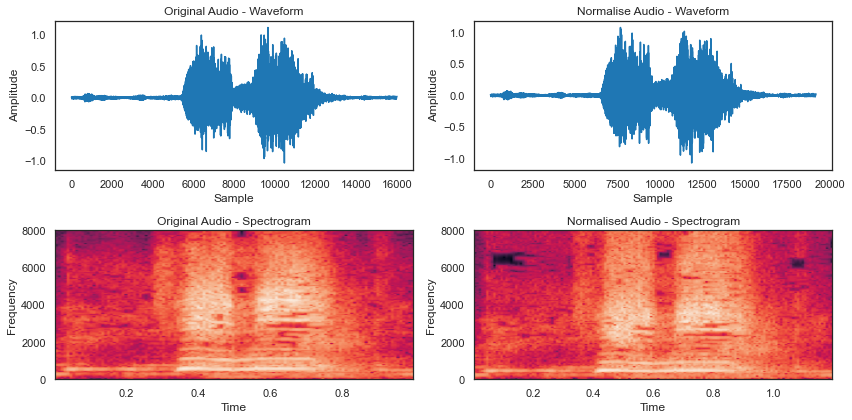

Original Audio:


Normalised Audio:


In [14]:
import os
import soundfile as sf
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

# Load the original and augmented audio
original_audio_path = 'audio_dataset/test/day_6/WhatsApp Ptt 2023-08-18 at 9.50.02 AM.ogg'
normalised_audio_path = 'normalized_augmented_audio/test/day_6/WhatsApp Ptt 2023-08-18 at 9.50.02 AM_stretch_1.20.ogg'

original_audio, sr_original = sf.read(original_audio_path)
normalised_audio, sr_normalised = sf.read(normalised_audio_path)

# Plot waveforms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title("Original Audio - Waveform")
plt.plot(original_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 2)
plt.title("Normalise Audio - Waveform")
plt.plot(normalised_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Plot spectrograms
plt.subplot(2, 2, 3)
plt.specgram(original_audio, Fs=sr_original)
plt.title("Original Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.specgram(normalised_audio, Fs=sr_normalised)
plt.title("Normalised Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Play the original audio
print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr_original))

# Play the augmented audio
print("Normalised Audio:")
ipd.display(ipd.Audio(normalised_audio, rate=sr_normalised))


### Spectral reduction on Normalised data 

In [15]:
import os
import soundfile as sf
import numpy as np
import librosa


normalized_augmented_dir = r'C:\Users\Lakshmi\Desktop\Main project\normalized_augmented_audio'
spectral_reduced_dir = r'C:\Users\Lakshmi\Desktop\Main project\spectral_reduced_audio'

# Create the new directory for spectral reduced files
os.makedirs(spectral_reduced_dir, exist_ok=True)

# Iterate through the normalized augmented audio files
for data_split in os.listdir(normalized_augmented_dir):
    data_split_dir = os.path.join(normalized_augmented_dir, data_split)
    spectral_reduced_data_split_dir = os.path.join(spectral_reduced_dir, data_split)
    
    # Create the directory for the spectral reduced data split
    os.makedirs(spectral_reduced_data_split_dir, exist_ok=True)
    
    for category in os.listdir(data_split_dir):
        category_dir = os.path.join(data_split_dir, category)
        spectral_reduced_category_dir = os.path.join(spectral_reduced_data_split_dir, category)
        
        # Create the directory for the spectral reduced category
        os.makedirs(spectral_reduced_category_dir, exist_ok=True)
        
        for normalized_file in os.listdir(category_dir):
            if normalized_file.endswith('.ogg'):
                normalized_audio_path = os.path.join(category_dir, normalized_file)
                spectral_reduced_audio_path = os.path.join(spectral_reduced_category_dir, normalized_file)
                
                # Load the normalized audio file
                normalized_audio, sr_normalized = sf.read(normalized_audio_path)
                
                # Apply spectral reduction
                spectral_reduced_audio = librosa.effects.percussive(normalized_audio)
                
                # Save the spectral reduced audio to the new directory
                sf.write(spectral_reduced_audio_path, spectral_reduced_audio, sr_normalized)

print("Spectral reduction and saving spectral reduced files complete!")


Spectral reduction and saving spectral reduced files complete!


Original Audio:


Cleaned Audio:


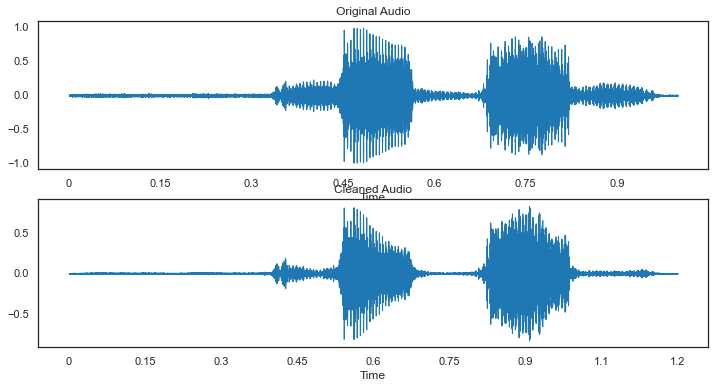

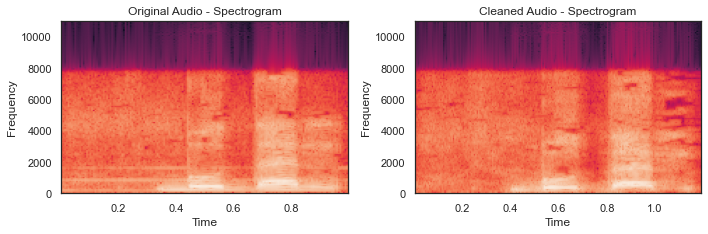

In [16]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

spec_path = 'spectral_reduced_audio/train/day_3/WhatsApp Audio 2023-07-06 at 7.45.04 PM_stretch_1.20.ogg'
original_path = 'audio_dataset/train/day_3/WhatsApp Audio 2023-07-06 at 7.45.04 PM.ogg'

y1, sr = librosa.load(original_path)
y2, sr = librosa.load(spec_path)

# Plot the original and cleaned audio signals
plt.figure(figsize=(12, 6))

# Display and play original audio
print("Original Audio:")
display(Audio(y1, rate=sr))


# Display and play cleaned audio
print("Cleaned Audio:")
display(Audio(y2, rate=sr))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y1, sr=sr)
plt.title('Original Audio')


plt.subplot(2, 1, 2)
librosa.display.waveshow(y2, sr=sr)
plt.title('Cleaned Audio')

# Plot the original and cleaned audio signals
plt.figure(figsize=(10, 6))

# Plot spectrograms
plt.subplot(2, 2, 3)
plt.specgram(y1, Fs=sr)
plt.title("Original Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.specgram(y2, Fs=sr)
plt.title("Cleaned Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## model building

In [17]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


train_dir = 'C:/Users/Lakshmi/Desktop/Main project/spectral_reduced_audio/train'


def load_data(data_dir, max_length):
    data = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(class_dir, audio_file)
                audio, _ = librosa.load(audio_path, sr=None)
                if len(audio) < max_length:
                    padding = np.zeros(max_length - len(audio))
                    audio = np.concatenate((audio, padding))
                else:
                    audio = audio[:max_length]
                data.append(audio)
                labels.append(class_idx)
    
    return np.array(data), np.array(labels)


sampling_rate = 44100  
time_in_seconds = 0.3  
max_length = int(time_in_seconds * sampling_rate)

# Load training data
train_data, train_labels = load_data(train_dir, max_length)

# Defining the number of classes 
num_classes = 7

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)

# Build the model
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(max_length, 1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using only the training data (without validation)
history = model.fit(train_data.reshape(-1, max_length, 1), train_labels, epochs=15, batch_size=32, validation_split=0)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13228, 16)         64        
                                                                 
 max_pooling1d (MaxPooling1  (None, 6614, 16)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 6612, 32)          1568      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 3306, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 3304, 64)          6208      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 1652, 64)          0

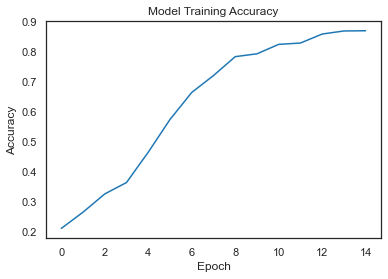

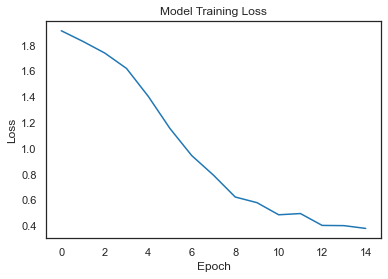

In [18]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

test_dir = 'C:/Users/Lakshmi/Desktop/Main project/spectral_reduced_audio/test'

# Load testing data
test_data, test_labels = load_data(test_dir, max_length)

# Predict using the trained model
test_predictions = model.predict(test_data.reshape(-1, max_length, 1))
test_predictions_labels = np.argmax(test_predictions, axis=1)

# Calculate accuracy
test_accuracy = accuracy_score(test_labels, test_predictions_labels)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_predictions_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(test_labels, test_predictions_labels)
print("Classification Report:")
print(class_report)


23/23 [==============================] - 3s 108ms/step
Test Accuracy: 0.30
Confusion Matrix:
[[11  8  6 21 44  1 21]
 [ 4  2  2 28 14  8 20]
 [ 6  1 23 10 27  3 16]
 [ 8  4  0 14  8  4 24]
 [20  3  5 18 48 16 18]
 [10  3  1 12 28 67 13]
 [13  2  2 20 28  6 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.10      0.12       112
           1       0.09      0.03      0.04        78
           2       0.59      0.27      0.37        86
           3       0.11      0.23      0.15        62
           4       0.24      0.38      0.30       128
           5       0.64      0.50      0.56       134
           6       0.31      0.42      0.36       122

    accuracy                           0.30       722
   macro avg       0.31      0.27      0.27       722
weighted avg       0.33      0.30      0.30       722



In [20]:
# Load and preprocess the unseen audio file
new_audio, _ = librosa.load('spectral_reduced_audio/train/day_4/WhatsApp Audio 2023-07-06 at 7.48.34 PM_stretch_1.20.ogg', sr=None)
if len(new_audio) < max_length:
    padding = np.zeros(max_length - len(new_audio))
    new_audio = np.concatenate((new_audio, padding))
else:
    new_audio = new_audio[:max_length]

# Reshape and normalize the data
new_audio = new_audio.reshape(1, max_length, 1)

# Make predictions
predictions = model.predict(new_audio)
predicted_day = np.argmax(predictions)

# Convert the predicted class index to the corresponding day
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
predicted_day_name = days_of_week[predicted_day]

print(f'Predicted day: {predicted_day_name}')


1/1 [==============================] - 0s 49ms/step
Predicted day: Thursday


spectral_reduced_audio/train/day_5/WhatsApp Audio 2023-07-07 at 3.41.14 PM_stretch_0.80.ogg
spectral_reduced_audio/train/day_7/WhatsApp Audio 2023-07-12 at 4.21.20 PM_stretch_0.80.ogg
spectral_reduced_audio/train/day_7/WhatsApp Audio 2023-07-12 at 4.22.03 PM_stretch_0.80.ogg
audio_dataset/train/day_5/WhatsApp Audio 2023-07-07 at 3.42.02 PM.ogg
spectral_reduced_audio/train/day_3/WhatsApp Audio 2023-07-06 at 7.45.04 PM (1)_stretch_1.20.ogg
spectral_reduced_audio/train/day_7/WhatsApp Audio 2023-07-12 at 4.21.20 PM_stretch_0.80.ogg
spectral_reduced_audio/test/day_1/WhatsApp Audio 2023-08-30 at 9.17.02 PM (4)_stretch_1.20.ogg
spectral_reduced_audio/test/day_6/WhatsApp Audio 2023-09-01 at 11.10.24 PM_stretch_0.80.ogg